In [34]:
import pandas as pd
from sklearn.svm import SVR
import pickle
import warnings
warnings.filterwarnings('ignore')
import lime
import numpy as np
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt
from lime import lime_tabular
import random

In [35]:
df = pd.read_csv("../data/hepatotoxicity_ALT_KlekFP_preprocessing_and_analyst.csv", header=0, index_col=False)

In [36]:
columns = list(df.columns.values)
columns.remove('ALT')

In [37]:
X = df[columns].values
y = df['ALT'].values

In [40]:
def prediciton_plot(result, y_test, y_pred_test, id):
    x=np.arange(start=0, stop=len(y_test))
    plt.figure(figsize=(14, 6))
    plt.plot(x, np.expm1(y_test), 'ro', label="y-origin")
    plt.plot(x, np.expm1(y_pred_test), 'go', label="y-predicted")
    plt.suptitle("r^2 score: " + str(result))
    plt.title("Statistics")
    plt.ylabel("Predictions")
    plt.grid()
    plt.legend(loc="lower right")
    plt.savefig('../explanations/predictions/SVR'+ str(id) + '.png')

### Reading models, explaine results with Lime

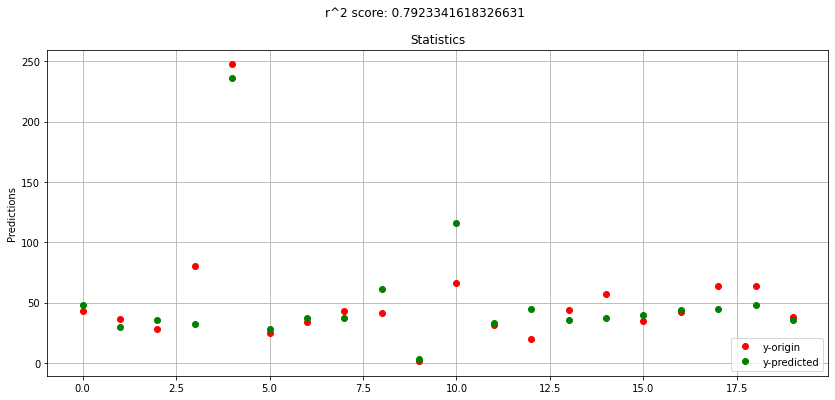

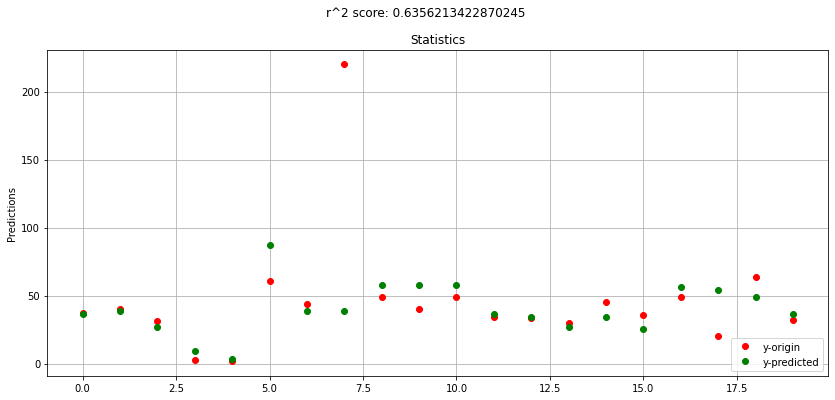

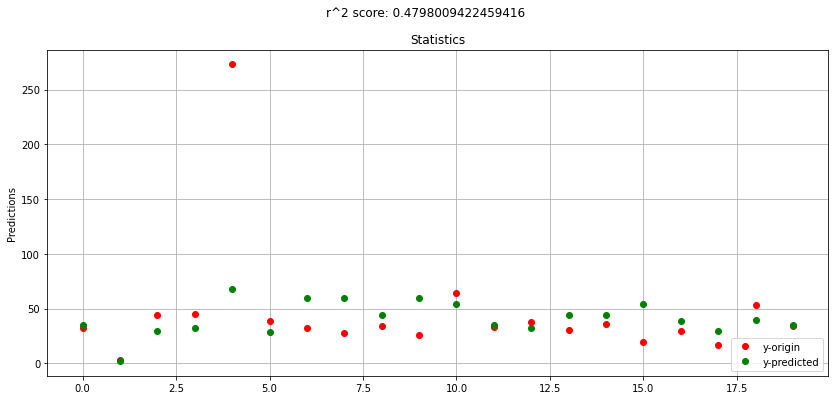

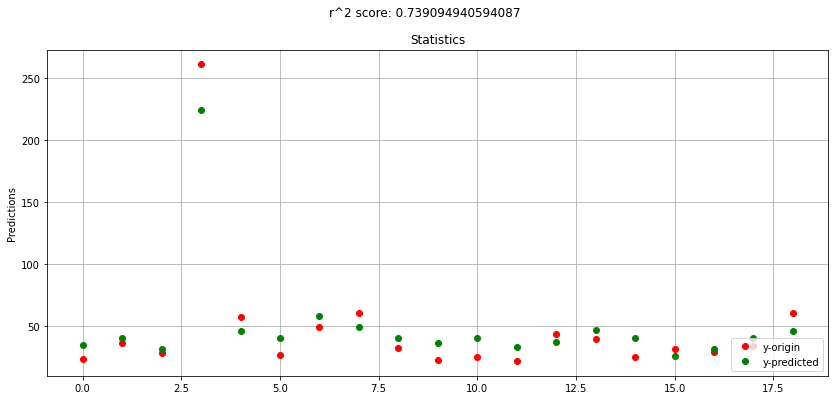

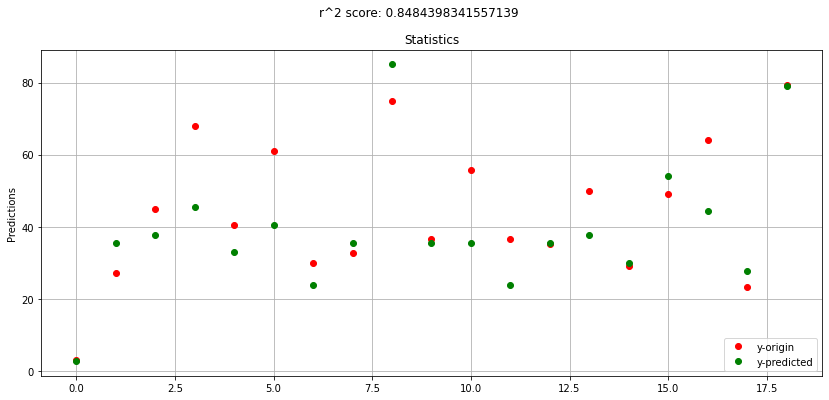

In [41]:
explonations=[]
for i, (train_index, test_index) in enumerate(KFold(n_splits=5, shuffle=True, random_state=234).split(X)):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = pickle.load(
        open(f"../data/all_models/pickles/SVR[" + str(i) + "].pickle", 'rb'))
    y_pred_test = model.predict(x_test)
    result = model.score(x_test, y_test)
    prediciton_plot(result, y_test, y_pred_test, i)

    explainer = lime_tabular.LimeTabularExplainer(x_train, mode="regression", feature_names=df.columns.values)

    idx = random.randint(1, len(x_test))-1
    explonation=explainer.explain_instance(x_test[idx], model.predict, num_features=len(df.columns.values))
    explonation.save_to_file("../explanations/explonation" + str(i) + ".html")
    explonations.append(explonation.as_list())

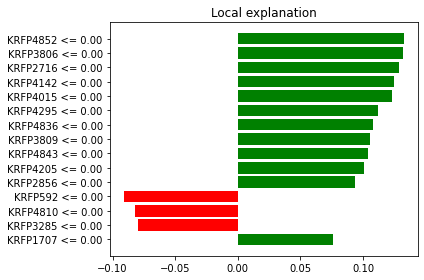

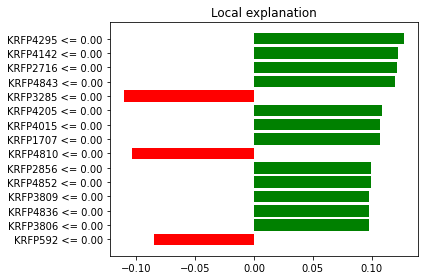

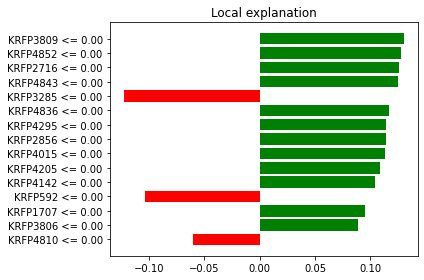

In [8]:
from matplotlib import pyplot as plt

for i in [2, 8, 15]:
    exp = explainer.explain_instance(x_test[i], model.predict,
            num_features=15)
    exp.as_pyplot_figure()
    plt.tight_layout()

In [23]:
explonations

[[('KRFP1566 > 0.00', -0.11395387383217326),
  ('KRFP3806 > 0.00', -0.10218254498052234),
  ('KRFP4015 > 0.00', -0.10173685317327918),
  ('KRFP4843 > 0.00', -0.10150333581503757),
  ('KRFP4836 > 0.00', -0.1012971761994396),
  ('KRFP4142 > 0.00', -0.10120126191924222),
  ('KRFP4295 > 0.00', -0.10059580198202825),
  ('KRFP4205 > 0.00', -0.10039304577522565),
  ('KRFP2856 > 0.00', -0.10030623390551352),
  ('KRFP4852 > 0.00', -0.09999976715618224),
  ('KRFP3809 > 0.00', -0.09918814927899104),
  ('KRFP2716 > 0.00', -0.09888511102858492),
  ('KRFP3285 <= 0.00', -0.09880273873747575),
  ('KRFP4810 <= 0.00', -0.09619870223849204),
  ('KRFP677 <= 0.00', 0.08880467621382893),
  ('KRFP2882 <= 0.00', -0.08605343829328001),
  ('KRFP1147 <= 0.00', -0.08563266946761523),
  ('KRFP566 > 0.00', -0.0841300364742789),
  ('KRFP592 <= 0.00', -0.07980283448223936),
  ('KRFP1707 > 0.00', -0.07951252708827906),
  ('KRFP466 <= 0.00', 0.07892263124642222),
  ('KRFP4659 <= 0.00', -0.07375454864915658),
  ('KRFP49

In [32]:
unimportant_bits = set([expl[0] for l in explonations for expl in l[-10:]])
important_bits = set([expl[0] for l in explonations for expl in l[:10]])

### The most important and the most unimportant bits

In [33]:
results = pd.DataFrame({'unimportant_bits': [*list(unimportant_bits)[:10]], 'important_bits': [*list(important_bits)[:10]]})

results.to_csv("../data/all_models/explanations_bits.csv", index=False)
results

,unimportant_bits,important_bits
0,KRFP1524 <= 0.00,KRFP4142 <= 0.00
1,KRFP670 <= 0.00,KRFP1799 <= 0.00
2,KRFP3177 <= 0.00,KRFP2716 <= 0.00
3,KRFP232 <= 1.00,KRFP1707 <= 0.00
4,KRFP3915 <= 0.00,KRFP4810 <= 0.00
5,KRFP2428 <= 0.00,KRFP1566 <= 0.00
6,KRFP1799 <= 0.00,KRFP3285 <= 0.00
7,KRFP3222 <= 1.00,KRFP2882 <= 0.00
8,KRFP2714 <= 0.00,KRFP4015 <= 0.00
9,KRFP2306 <= 0.00,KRFP3010 <= 0.00
